In [1]:
import pandas as pd
np = pd.np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/govdata/govdata_15min_panel.csv', index_col=[0,1], parse_dates=True)

In [3]:
df.sort_index(inplace=True)
df

pm25   pm10
monitor_id      timestamp_round                  
AnandVihar_DPCC 2018-03-01 00:00:00  195.0  707.0
                2018-03-01 00:15:00  195.0  707.0
                2018-03-01 00:30:00  181.0  606.0
                2018-03-01 00:45:00  181.0  606.0
                2018-03-01 01:00:00  181.0  606.0
                2018-03-01 01:15:00  181.0  606.0
                2018-03-01 01:30:00  174.0  550.0
                2018-03-01 01:45:00  174.0  550.0
                2018-03-01 02:00:00  174.0  550.0
                2018-03-01 02:15:00  174.0  550.0
                2018-03-01 02:30:00  188.0  442.0
                2018-03-01 02:45:00  188.0  442.0
                2018-03-01 03:00:00  188.0  442.0
                2018-03-01 03:15:00  188.0  442.0
                2018-03-01 03:30:00  209.0  661.0
                2018-03-01 03:45:00  209.0  661.0
                2018-03-01 04:00:00  209.0  661.0
                2018-03-01 04:15:00  209.0  661.0
                2018-03-01 04:30:00  183.0  399.0
                2018-03-01 04:45:00  183.0  399.0
                2018-03-01 05:00:00  183.0  399.0
                2018-03-01 05:15:00  183.0  399.0
                2018-03-01 05:30:00  129.0  291.0
                2018-03-01 05:45:00  129.0  291.0
                2018-03-01 06:00:00  129.0  291.0
                2018-03-01 06:15:00  129.0  291.0
                2018-03-01 06:30:00  138.0  379.0
                2018-03-01 06:45:00  138.0  379.0
                2018-03-01 07:00:00  138.0  379.0
                2018-03-01 07:15:00  138.0  379.0
...                                    ...    ...
Wazirpur_DPCC   2019-02-28 16:30:00  313.0  153.0
                2019-02-28 16:45:00  313.0  153.0
                2019-02-28 17:00:00  328.0  168.0
                2019-02-28 17:15:00  328.0  168.0
                2019-02-28 17:30:00  328.0  168.0
                2019-02-28 17:45:00  328.0  168.0
                2019-02-28 18:00:00  345.0  167.0
                2019-02-28 18:15:00  345.0  167.0
                2019-02-28 18:30:00  345.0  167.0
                2019-02-28 18:45:00  345.0  167.0
                2019-02-28 19:00:00  294.0  158.0
                2019-02-28 19:15:00  294.0  158.0
                2019-02-28 19:30:00  294.0  158.0
                2019-02-28 19:45:00  294.0  158.0
                2019-02-28 20:00:00  250.0  133.0
                2019-02-28 20:15:00  250.0  133.0
                2019-02-28 20:30:00  250.0  133.0
                2019-02-28 20:45:00  250.0  133.0
                2019-02-28 21:00:00  204.0  130.0
                2019-02-28 21:15:00  204.0  130.0
                2019-02-28 21:30:00  204.0  130.0
                2019-02-28 21:45:00  204.0  130.0
                2019-02-28 22:00:00  190.0  117.0
                2019-02-28 22:15:00  190.0  117.0
                2019-02-28 22:30:00  190.0  117.0
                2019-02-28 22:45:00  190.0  117.0
                2019-02-28 23:00:00  169.0  112.0
                2019-02-28 23:15:00  169.0  112.0
                2019-02-28 23:30:00  169.0  112.0
                2019-02-28 23:45:00  169.0  112.0

[1156320 rows x 2 columns]

In [4]:
locs_df = pd.read_csv('data/govdata/govdata_locations.csv', index_col=[0])
locs_df

,Latitude,Longitude,Location
Monitor ID,,,
AnandVihar_DPCC,28.646835,77.316032,"Anand Vihar, Delhi - DPCC"
AshokVihar_DPCC,28.695381,77.181665,"Ashok Vihar, Delhi - DPCC"
AyaNagar_IMD,28.470691,77.109936,"Aya Nagar, New Delhi - IMD"
BurariCrossing_IMD,28.725650,77.201157,"Burari Crossing, New Delhi - IMD"
CRRIMathuraRoad_IMD,28.551201,77.273574,"CRRI Mathura Road, New Delhi - IMD"
DKSSR_DPCC,28.498571,77.264840,"Dr. Karni Singh Shooting Range, Delhi - DPCC"
DTU_CPCB,28.750050,77.111261,"DTU, New Delhi - CPCB"
DwarkaSector8_DPCC,28.571027,77.071901,"Dwarka-Sector 8, Delhi - DPCC"
EastArjunNagar_CPCB,28.655602,77.285932,"East Arjun Nagar, Delhi - CPCB"


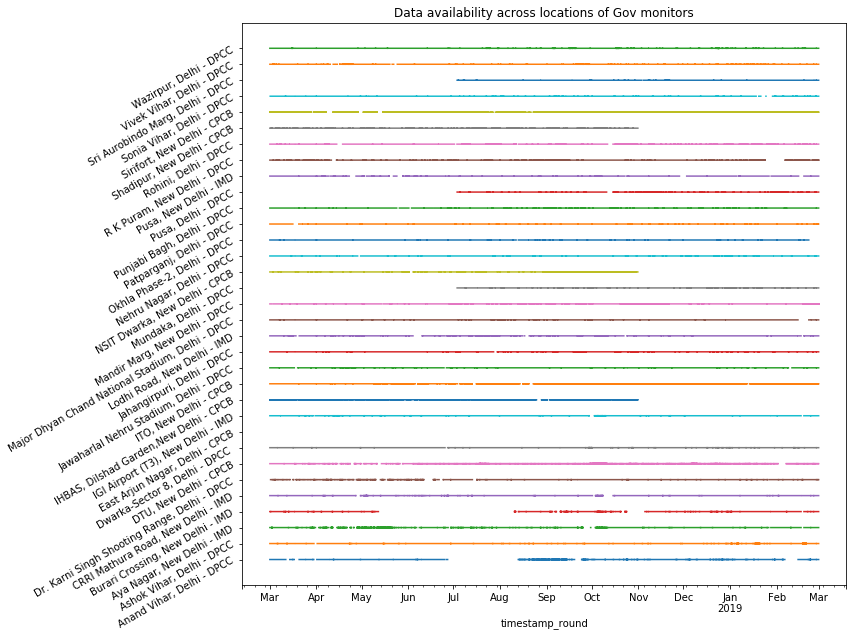

In [5]:
grouped = df.groupby(level=0)

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)

for count, (name, group) in enumerate(grouped, 1):
    # plot the data availability
    group.reset_index(level=0, drop=False, inplace=True)
    group.pm25.where(np.isnan(group.pm25), other=count).plot()

ax.set_yticks(np.arange(1,count+1))
ax.set_yticklabels([locs_df.loc[name,'Location'] for (name,group) in grouped], rotation=30)
ax.set_title('Data availability across locations of Gov monitors')
plt.tight_layout()
#fig.savefig('data/datagaps_pm25_govdata.png')
#fig.savefig('data/datagaps_pm25_govdata.pdf')

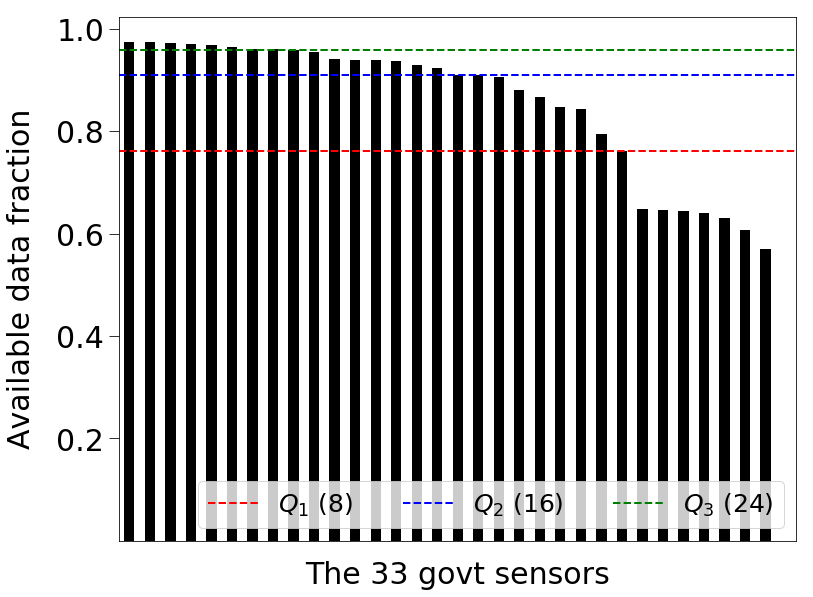

In [9]:
# display availability based on percent counts
grouped = df.groupby(level=0)
validfracs = (grouped.pm25.count() / grouped.pm25.size())
validfracs.sort_values(ascending=False, inplace=True)

pt1 = np.percentile(validfracs.values, 25)
pt2 = np.percentile(validfracs.values, 50)
pt3 = np.percentile(validfracs.values, 75)

n1 = validfracs.size // 4
n2 = 2*n1
n3 = 3*n1

plt.rc('font', size=30)
plt.rc('ps', useafm=True)
plt.rc('pdf', use14corefonts=True)

plt.figure(figsize=(12,9))
# validfracs.plot(kind='hist', bins=30)
# plt.xlim(0,1)
validfracs.plot(kind='bar', color='k', label='')
# plt.bar(validfracs.values, color='k')
xmin, xmax = plt.xlim()
plt.hlines([pt1], xmin, xmax, colors='r', linestyles='--', lw=2, label=r'$Q_1$ ({})'.format(n1))
plt.hlines([pt2], xmin, xmax, colors='b', linestyles='--', lw=2, label=r'$Q_2$ ({})'.format(n2))
plt.hlines([pt3], xmin, xmax, colors='g', linestyles='--', lw=2, label=r'$Q_3$ ({})'.format(n3))
plt.xlim(xmin, xmax)
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(6, prune='both'))
plt.tick_params(length=10, pad=5, labelbottom=0, bottom=0)
plt.xlabel('The {} govt sensors'.format(validfracs.size), labelpad=20)
plt.ylabel('Available data fraction', labelpad=20)
plt.legend(ncol=3, fontsize='small', loc='lower right')
plt.tight_layout()
plt.savefig('data/datagaps_govdata_bar.eps')
plt.show()

In [13]:
plt.close('all')